In [1]:
!export SPARK_LOCAL_DIRS="/data/tmp/conner"
!export PYSPARK_PYTHON="/home/connermanuel/.cache/pypoetry/virtualenvs/cider-pYyYiFm9-py3.8/bin/python"
!export PYSPARK_DRIVER_PYTHON="/home/connermanuel/.cache/pypoetry/virtualenvs/cider-pYyYiFm9-py3.8/bin/python"

In [2]:
from cider.ml import Learner
from cider.datastore import DataStore
import pandas as pd
import pyspark

In [3]:
cfg_file = './config.yml'
ds = DataStore(cfg_file)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/05 13:45:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/05/05 13:45:57 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/05/05 13:45:57 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [4]:
learner = Learner(ds)

Number of observations with features: 11392 (11392 unique)
Number of observations with labels: 13049 (13049 unique)
Number of matched observations: 11392 (11392 unique)


In [5]:
ds.x = ds.x.iloc[:, :-11]

In [6]:
ds.labels

DataFrame[name: string, label: string, weight: int]

# Untuned Learners

In [7]:
ds.x

,cdr_active_days_allweek_allday,cdr_active_days_allweek_day,cdr_active_days_allweek_night,cdr_active_days_weekday_allday,cdr_active_days_weekday_day,cdr_active_days_weekday_night,cdr_active_days_weekend_allday,cdr_active_days_weekend_day,cdr_active_days_weekend_night,cdr_number_of_contacts_allweek_allday_call,...,location_prefectures_PLATEAUX_percent,location_prefectures_CENTRALE_percent,location_prefectures_KARA_percent,location_prefectures_SAVANES_percent,location_prefectures_Unknown_percent,location_prefectures_Lome_percent,location_prefectures_MARITIME_percent,location_count(regions),location_count(cantons),location_count(prefectures)
0,124,100.0,64.0,93.0,78.0,47.0,31.0,22.0,17.0,69.0,...,0.000000,0.000000,0.990566,0.000000,0.009434,0.000000,0.000000,2,6,2
1,74,62.0,35.0,54.0,45.0,27.0,20.0,17.0,8.0,35.0,...,0.000000,0.000000,0.658537,0.000000,0.341463,0.000000,0.000000,2,6,2
2,165,155.0,123.0,116.0,109.0,84.0,49.0,46.0,39.0,173.0,...,0.000000,0.000000,0.714768,0.167932,0.117300,0.000000,0.000000,3,13,3
3,69,64.0,32.0,46.0,43.0,22.0,23.0,21.0,10.0,86.0,...,0.000000,0.944882,0.000000,0.000000,0.055118,0.000000,0.000000,2,12,2
4,12,4.0,10.0,8.0,3.0,7.0,4.0,1.0,3.0,7.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11387,5,5.0,NaN,4.0,4.0,NaN,1.0,1.0,NaN,2.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1,1,1
11388,18,13.0,6.0,14.0,10.0,5.0,4.0,3.0,1.0,11.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1,4,1
11389,164,149.0,81.0,117.0,106.0,53.0,47.0,43.0,28.0,137.0,...,0.001484,0.010386,0.847181,0.026706,0.044510,0.022255,0.047478,6,20,7
11390,85,67.0,43.0,58.0,44.0,29.0,27.0,23.0,14.0,46.0,...,0.000000,0.672043,0.000000,0.000000,0.327957,0.000000,0.000000,2,4,2


In [ ]:
untuned_lasso_scores = learner.untuned_model('lasso')

In [ ]:
untuned_lasso_scores

In [8]:
untuned_rf_scores = learner.untuned_model('randomforest')

In [9]:
untuned_rf_scores

{'train_r2': '0.04 (0.00)',
 'test_r2': '0.00 (0.00)',
 'train_rmse': '0.51 (-0.00)',
 'test_rmse': '0.52 (-0.00)'}

In [10]:
# untuned_gb_scores = learner.untuned_model('gradientboosting')
# untuned_gb_scores

# Tuned Learners

In [11]:
tuned_lasso_scores = learner.tuned_model('lasso')
tuned_lasso_scores

{'train_r2': '0.01 (0.00)',
 'test_r2': '0.00 (0.00)',
 'train_rmse': '0.52 (-0.00)',
 'test_rmse': '0.52 (-0.00)'}

In [ ]:
tuned_rf_scores = learner.tuned_model('randomforest')
tuned_rf_scores

In [22]:
tuned_rf_scores

{'train_r2': '0.04 (0.00)',
 'test_r2': '0.00 (0.00)',
 'train_rmse': '0.51 (-0.00)',
 'test_rmse': '0.52 (-0.00)'}

In [ ]:
# tuned_gb_scores = learner.tuned_model('gradientboosting')
# tuned_gb_scores

# Plots

In [23]:
rf_preds = learner.oos_predictions('randomforest')

/home/connermanuel/.cache/pypoetry/virtualenvs/cider-pYyYiFm9-py3.8/lib64/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/connermanuel/.cache/pypoetry/virtualenvs/cider-pYyYiFm9-py3.8/lib64/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/connermanuel/.cache/pypoetry/virtualenvs/cider-pYyYiFm9-py3.8/lib64/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/connermanuel/.cache/pypoetry/virtualenvs/cider-pYyYiFm9-py3.8/lib64/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/connermanuel/.cache/py

In [24]:
lasso_preds = learner.oos_predictions('lasso')

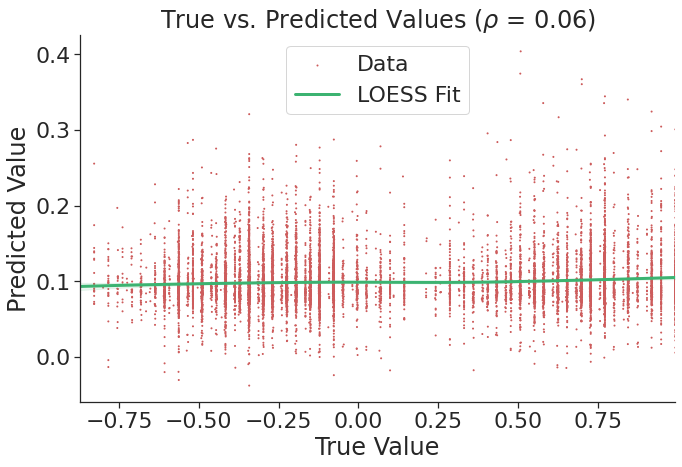

In [25]:
learner.scatter_plot(model_name='randomforest')

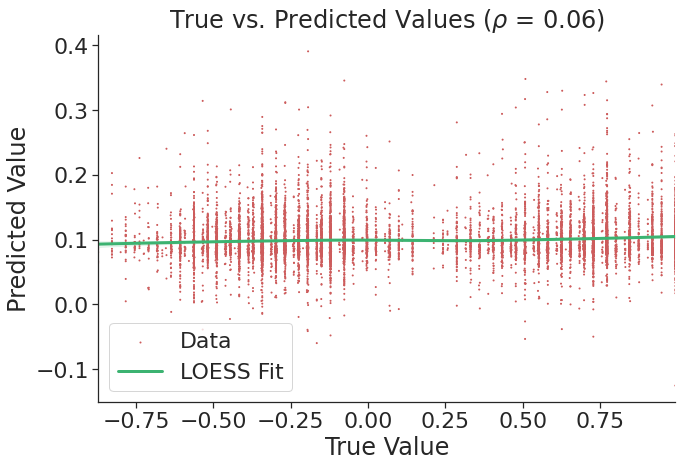

In [26]:
learner.scatter_plot(model_name='lasso')